In [2]:
!jt -t oceans16 -T -N -tfs 12

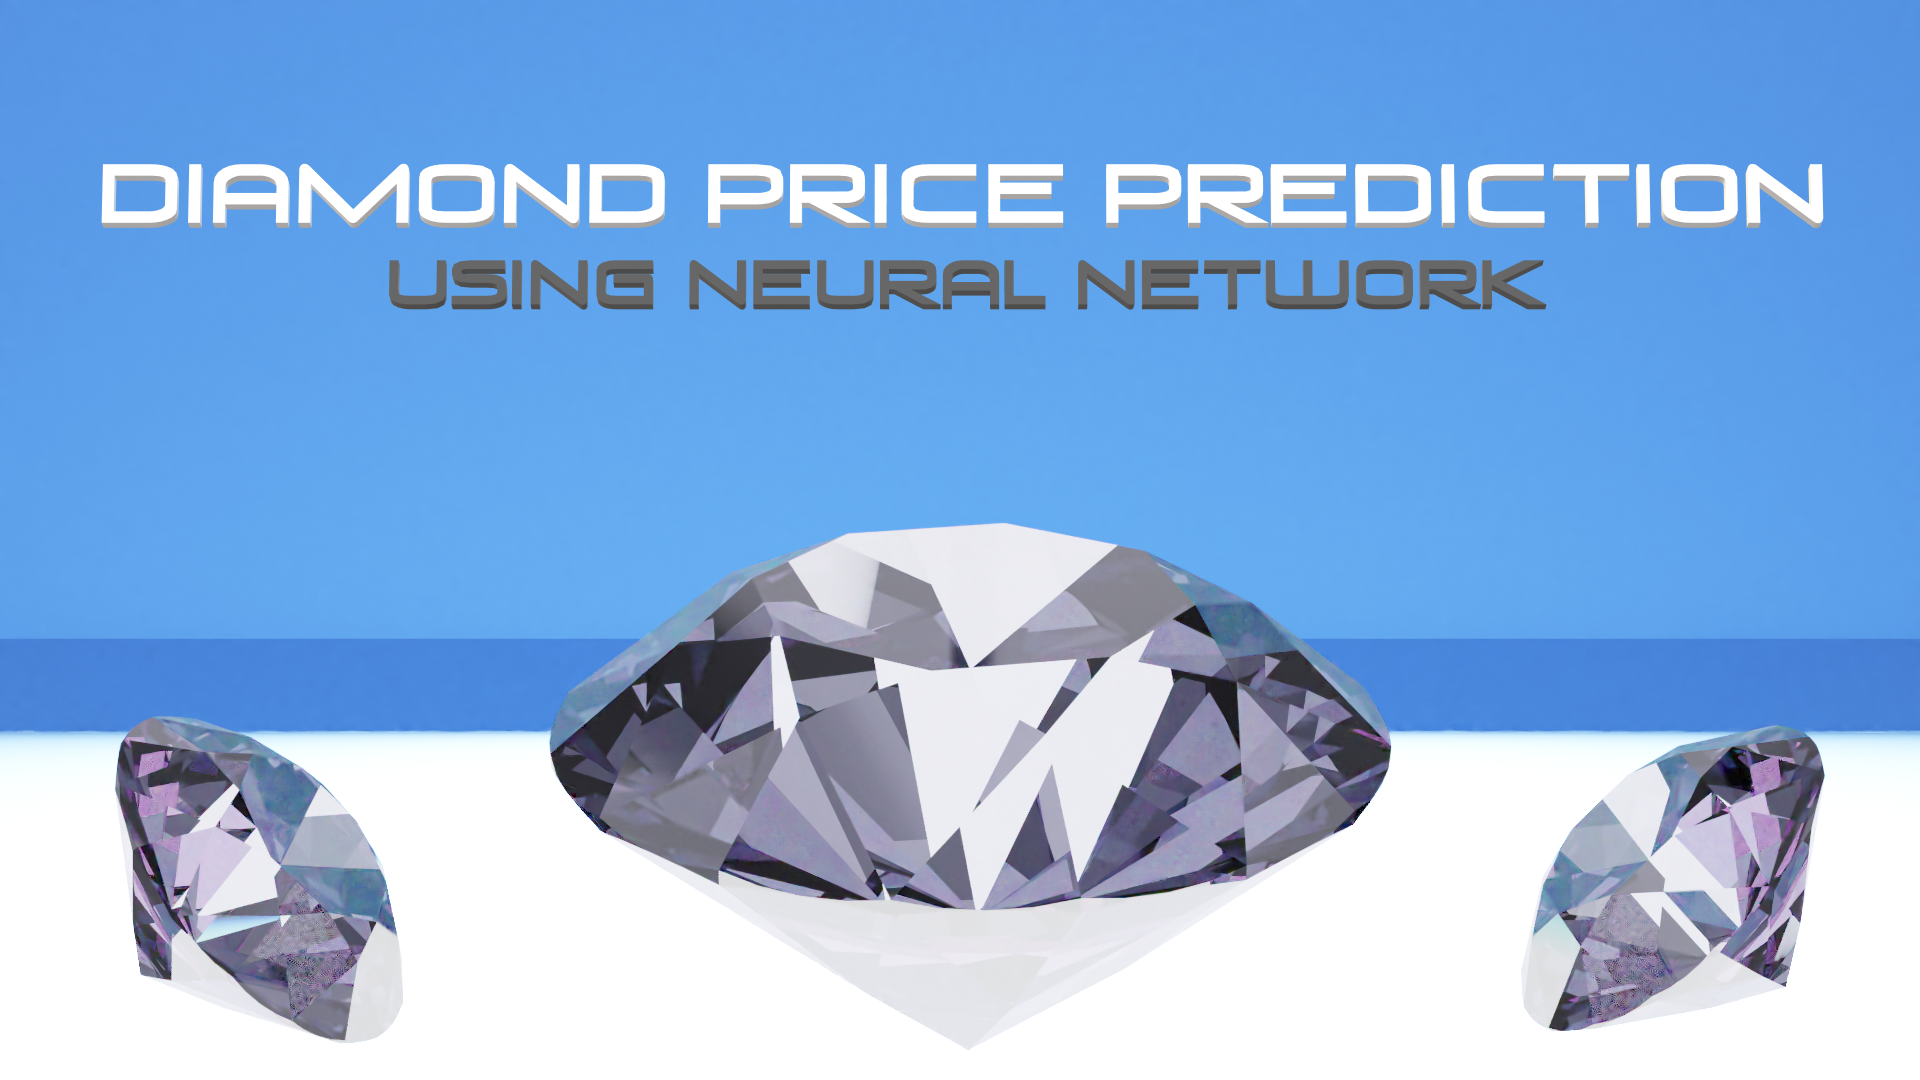


<a id="0"></a> <br>
#  Table of Contents  
* [Introduction](#intro)
    * [About The Dataset](#about)

<a class="anchor" id="intro"></a>
# Introduction
In this exercise we will determine if diamond prices can be predicted using linear regression and a neural network.<br><br>

<a class="anchor" id="about"></a>
### About The Dataset
The diamond dataset for this project has the following characteristics:
* 53,940 unique rows
* 10 columns total
* 3 columns with categorial values
* 7 columns with numeric values <br><br>

### Breakdown of the variables (columns):
**Carat:** Measures the weight of a diamond. (Min: 0.2, Max: 5.01) <br><br>
**Cut:** Quality of the diamond's cut. (Fair, Good, Very Good, Premium, Ideal) <br><br> 
**Color:** The coloration of the diamond. This dataset has 7 colors which are sorted in alphabetical order.<br>(Best: D, Worst: J) <br><br>
**Clarity:** A scale of how many imperfections are inside the diamond. Internally Flawless (IF) is the best clarity in this dataset. Clarity ranked worst to best: (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1)
<br><br>
**Table:** The table is the flat surface found at the very top of the stone. A diamond's table is measured as the ratio of the width of the table in relation to the width of the entire diamond. <br><br>
**Depth:** A percentage showing the diamond's height in relation to its width. This is not to be confused with the z-axis measurement which is explained below. <br><br>
**X:** The width of the diamond on the x-axis. Measured in millimetre. <br><br>
**Y:** The width of the diamond on the y-axis. Measured in millimetre. <br><br>
**Z:** The height of the diamond. Measured in millimetre. <br><br>





**The dataset can be found and downloaded here:** https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices


## Part 1: Preparing the Notebook Environment
We will setup the notebook for easier reading during this stage.

**Add code allowing us to toggle visibility of cells.**

In [3]:
# This cell is based on code written by Damian Kao. 
# The original source can be viewed here: https://blog.nextgenetics.net/?e=102
import random
from IPython.display import HTML

def hide_cell():

    html ='''<script>
  code_show=true; 
  function code_toggle() {
    if (code_show){
        $('.cm-comment:contains(@hidden)').closest('div.input').hide();
    } else {
        $('.cm-comment:contains(@hidden)').closest('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>

Click <a href="javascript:code_toggle()">this</a> button and scroll UP, to view hidden code.
    '''

    return HTML(html)

## Part 1: Loading The Dataset
Now that we understand the data, lets load it into a format that allows us to work with it.


<div class="alert alert-block alert-info">
Pandas provides us with the ability to create a dataframe, 
which is well suited to handling a file of this size. 
We will manually select which columns to use, since the dataset 
by default has an ID column attached, which is of no use to us. 
Finally, we will print the first and last 5 rows of the dataframe 
to verify all the needed columns are there.
</div>

In [4]:
import pandas as pd

df = pd.read_csv('diamond_sales.csv', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(df.head())
print('_' * 75)
print(df.tail())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
___________________________________________________________________________
       carat        cut color clarity  depth  table  price     x     y     z
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64
53940   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74  3.49
53941   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73  3.43
53942   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76  3.47


><div class="alert alert-block alert-info">
Based on the printout above, the dataset appears to have been imported correctly.
</div>

## Part 2 Preparing the Dataset
The dataset is now loaded, lets alter it to fit our needs.
During this phase we will do the following:
* Check dataset for null values
* Convert categorial values to numeric


**Let's start by checking for any null values.**


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

><div class="alert alert-block alert-info">
    There are no null values in this dataset.
</div>

**Next we will replace all the categorial variables with numeric values.** All the categorial variables in this dataset are ordinal, meaning they can be ranked in an order. For example, we can rank diamond cut from worst to best. Since they are ordinal, the job of assigning numeric values is straightforward. A low number denotes a less desirable variable. This step can be considered "Feature Engineering".


In [6]:
# Create new dataframe that is a copy of the original
df_numeric = df.copy(True)

# Replacing diamond colors
diamond_colors = {'D' : 7, 'E' : 6, 'F' : 5, 'G' : 4, 'H' : 3, 'I' : 2, 'J' : 1}
df_numeric.color.replace(to_replace=diamond_colors, inplace=True)

# Replacing diamond clarity
diamond_clarity = {'IF' : 8, 'VVS1' : 7, 'VVS2' : 6, 'VS1' : 5, 
                   'VS2' : 4 , 'SI1' : 3, 'SI2': 2, 'I1' : 1}
df_numeric.clarity.replace(to_replace=diamond_clarity,  inplace=True)

# Replacing diamond cut
diamond_cut = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
df_numeric.cut.replace(diamond_cut, inplace=True)

# Print head to verify changes
print(df_numeric.head())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    5      6        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    4      6        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      6        5   56.9   65.0    327  4.05  4.07  2.31
3   0.29    4      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      1        2   63.3   58.0    335  4.34  4.35  2.75


><div class="alert alert-block alert-info">
    Notice how all columns now have numeric values.
</div>

## Part 1.2: Removing Outliers
There may be certain diamonds in the dataset that have abnormal characteristics, these values can potentially affect our ability to make predictions. We will initially focus only on outliers in the categories related to the diamond's size, if our prediction accuracy is still lacking, we will go back and further analyse outliers.
These are the steps we will use:
* Use boxplots to identify outliers
* Remove outliers using IQR

**Let's write code to create boxplots for the 'Carat' characteristic.**

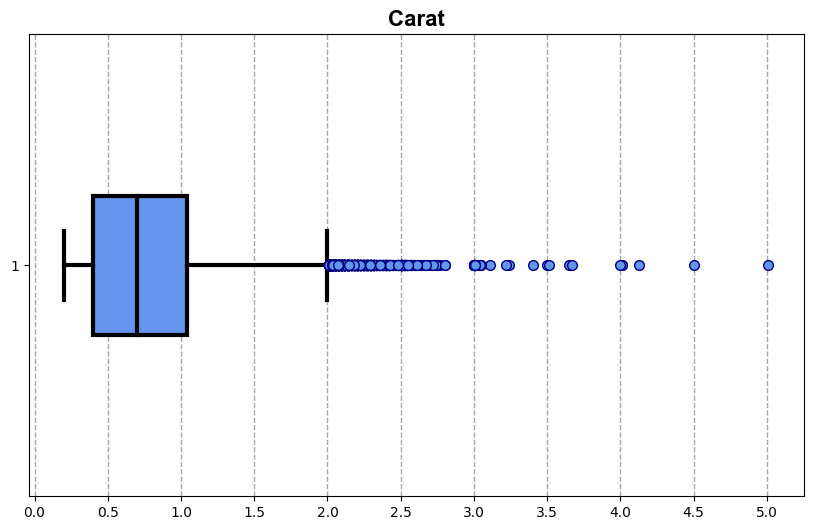

In [7]:
import matplotlib.pyplot as plt

plot_font = {'family': 'arial', 'color': 'black', 'weight': 'bold', 'size': 16}

# Carat box plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(x=df["carat"], meanline=True, vert=False, widths=0.3, patch_artist=True,
           boxprops=dict(facecolor="cornflowerblue", edgecolor="black", linewidth=3),  
           capprops=dict(color="black",  linewidth=3),
           whiskerprops=dict(color="black", linewidth=3), 
           flierprops=dict(marker="o", markersize=7, markerfacecolor="cornflowerblue", 
                           markeredgecolor="navy"),  
           medianprops=dict(color="black",  linewidth=3))

plt.locator_params(axis='x', nbins=20)  # Ticks
plt.grid(color='grey', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.title("Carat", fontdict=plot_font)

# show plot
plt.show()

><div class="alert alert-block alert-info">
    <b>Findings:</b> Based on the plot above, some diamonds in the dataset are abnormally large.
</div>

**Lets do the same for the X, Y and Z measurements.** The code will be roughly the same and therefore be hidden by default.

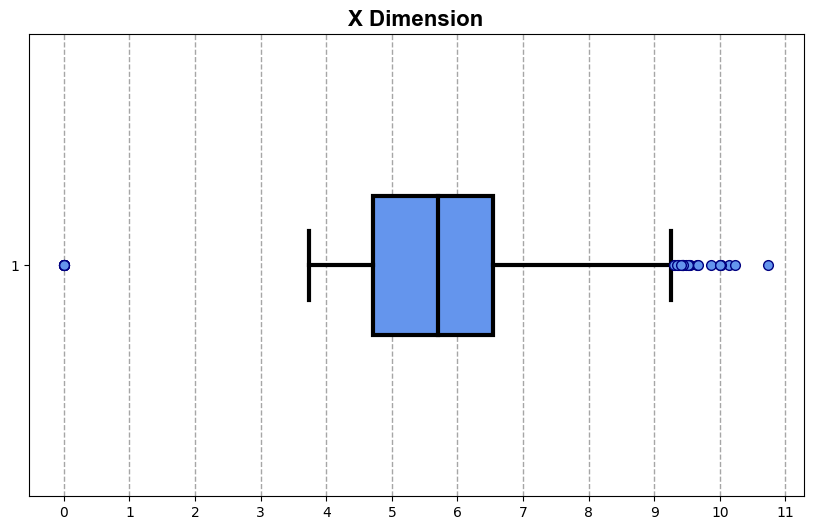

In [8]:
# @hidden

# X box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(x=df["x"], meanline=True, vert=False, widths=0.3, patch_artist=True,
           boxprops=dict(facecolor="cornflowerblue", edgecolor="black", linewidth=3),  # The square
           capprops=dict(color="black",  linewidth=3),
           whiskerprops=dict(color="black", linewidth=3),  # The extending lines
           flierprops=dict(marker="o", markersize=7, markerfacecolor="cornflowerblue", markeredgecolor="navy"),  # Fliers are outliers
           medianprops=dict(color="black",  linewidth=3))
plt.locator_params(axis='x', nbins=20)  # Ticks
plt.grid(color='grey', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.title("X Dimension", fontdict=plot_font)

# show plot
plt.show()

hide_cell()

><div class="alert alert-block alert-info">
    <b>Findings:</b> Some of the plotted values are abnormally large. There also appears to be a value that is equal to zero, this could potentially be an incorrect entry.
</div>

**Next let's plot the 'Y' characteristic.**

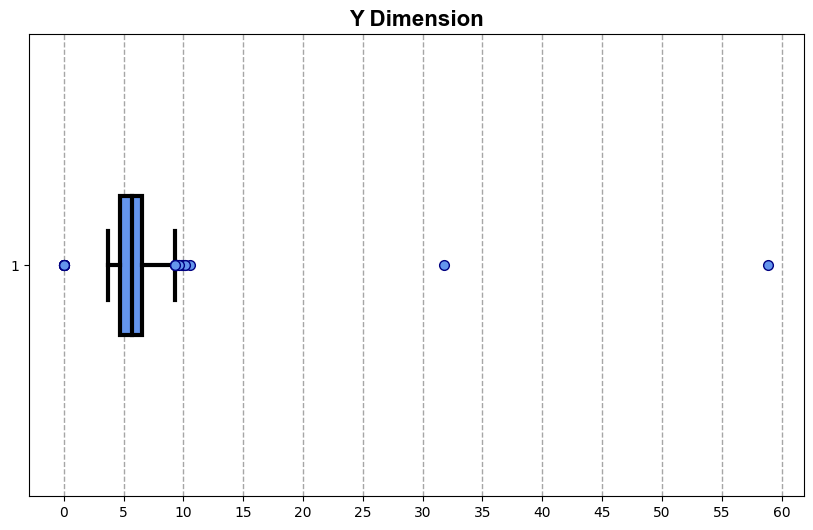

In [9]:
# @hidden

# Y box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(x=df["y"], meanline=True, vert=False, widths=0.3, patch_artist=True,
           boxprops=dict(facecolor="cornflowerblue", edgecolor="black", linewidth=3),  # The square
           capprops=dict(color="black",  linewidth=3),
           whiskerprops=dict(color="black", linewidth=3),  # The extending lines
           flierprops=dict(marker="o", markersize=7, markerfacecolor="cornflowerblue", markeredgecolor="navy"),  # Fliers are outliers
           medianprops=dict(color="black",  linewidth=3))
plt.locator_params(axis='x', nbins=20)  # Ticks
plt.grid(color='grey', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.title("Y Dimension", fontdict=plot_font)

# show plot
plt.show()

hide_cell()

><div class="alert alert-block alert-info">
    <b>Findings:</b> There are multiple outliers that are larger than average. Once again, a value close to zero exists.
</div>

**Finally, we will plot the 'Z' characteristic.**

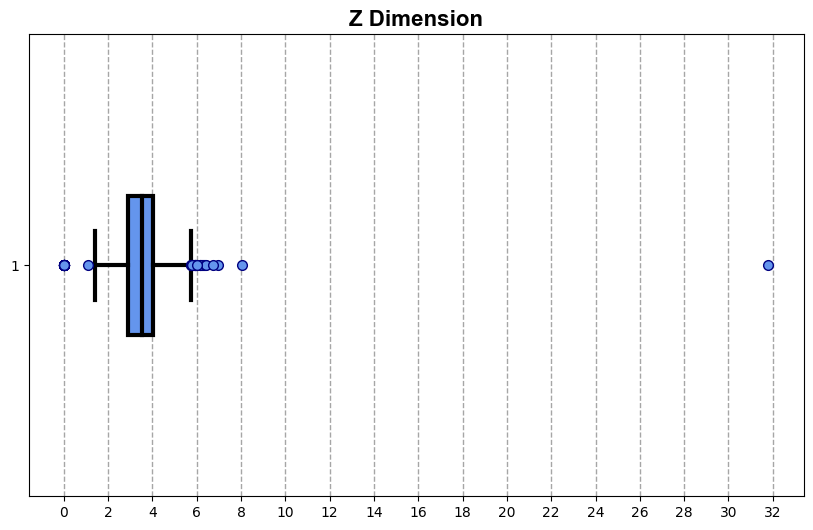

In [10]:
# @hidden

# Z box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(x=df["z"], meanline=True, vert=False, widths=0.3, patch_artist=True,
           boxprops=dict(facecolor="cornflowerblue", edgecolor="black", linewidth=3),  # The square
           capprops=dict(color="black",  linewidth=3),
           whiskerprops=dict(color="black", linewidth=3),  # The extending lines
           flierprops=dict(marker="o", markersize=7, markerfacecolor="cornflowerblue", markeredgecolor="navy"),  # Fliers are outliers
           medianprops=dict(color="black",  linewidth=3))
plt.locator_params(axis='x', nbins=20)  # Ticks
plt.grid(color='grey', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.title("Z Dimension", fontdict=plot_font)

# show plot
plt.show()

hide_cell()

><div class="alert alert-block alert-info">
    <b>Findings:</b> There are outliers on both sides of the plot. 
</div>

**Time to remove those outliers using the interquartile range (IQR) technique.** We have established that there are indeed outliers in the dataset, using some basic math, we can remove values that stretch past the lower and upper limit of the data.

In [11]:
# Defining a function to remove outliers
def remove_outliers(column_name, df):

    # Calculate interquartile range
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_boundary = q1 - 1.5 * iqr
    upper_boundary = q3 + 1.5 * iqr

    # Scan for outliers
    lower_index = df[(df[column_name] < lower_boundary)].index
    upper_index = df[(df[column_name] > upper_boundary)].index

    # Drop outliers
    prior_rows = len(df.axes[0])
    df.drop(lower_index, inplace=True)
    df.drop(upper_index, inplace=True)
    new_rows = len(df.axes[0])

    # Return how many rows were dropped
    return prior_rows - new_rows

In [26]:
# Removing outliers using newly defined function
print("The amount of outliers removed per column:")
print("Carat: ", remove_outliers("carat", df))
print("X: ", remove_outliers('x', df))
print("Y: ", remove_outliers('y', df))
print("Z: ", remove_outliers('z', df))

The amount of outliers removed per column:
Carat:  276
X:  0
Y:  0
Z:  0


><div class="alert alert-block alert-info">
    <b>Findings:</b> Most outliers have potential to overlap. A diamond with an unusual carat weight could have unusual dimensions too. This is why many values are dropped initially when the "Carat" row is checked, and why far fewer values are dropped when other rows are checked. 
</div>

## Part 2: Exploratory Data Analysis
At this stage we will broaden our understanding of the data by visually plotting out relationships between the various characteristics. The goal is to discover patterns and reveal new information about the data. <br></br>

### During this stage we will do the following:
>**(2.1) Univariate Graphical Analysis.**  <br></br>
>**(2.2) Multivariate Graphical Analysis.**

## Part 2.1: Univariate Graphical Analysis
**During this step we will use graphs to examine individual characteristics. We will not take into account how these variables influence others.** For this section, we will examine at which frequency each type of categorial variable appears. This will help us to figure out what the most common diamond coloration is for example.

**First, we gather the needed values.**

In [13]:
# Frequency of CLARITY
unique_clarity = df.clarity.value_counts()
clarity_y = unique_clarity.values  # Y-axis of bar plot
clarity_x = unique_clarity.index  # X-axis of bar plot

# Frequency of COLOR
unique_color = df.color.value_counts()
color_y = unique_color.values
color_x = unique_color.index

# Frequency of CUT
unique_cut = df.cut.value_counts()
cut_y = unique_cut.values
cut_x = unique_cut.index

**Next, we create bar charts using collected data.**

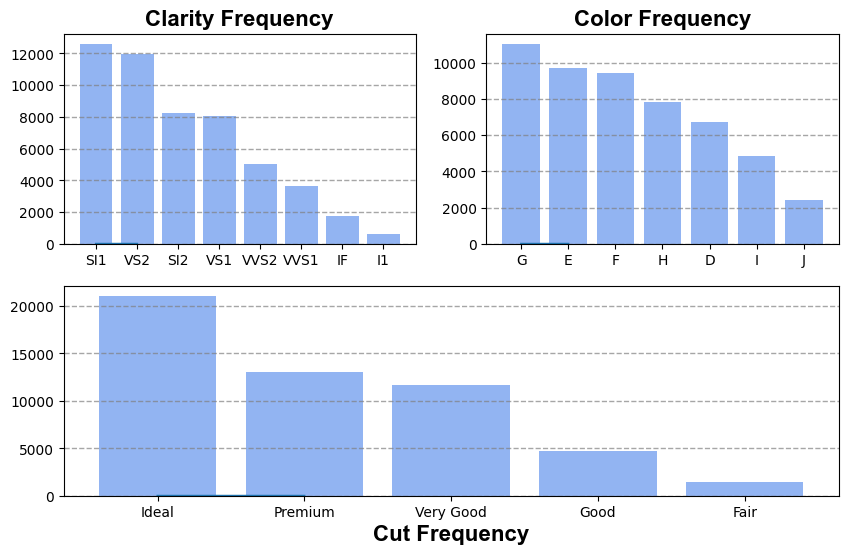

In [14]:
from matplotlib import gridspec

# This will create a chart window capable of showing 4 charts total
gs = gridspec.GridSpec(2, 2)

# Used for bar chart labels
plot_font = {'family': 'arial', 'color': 'black', 'weight': 'bold', 'size': 16}

# Set size of the chart window
plt.figure(figsize=(10, 6))

# Diamond clarity frequency bar chart
clarity_chart = plt.subplot(gs[0, 0]) # row 0, col 0
clarity_chart.set_title("Clarity Frequency", fontdict=plot_font)
clarity_chart.bar(clarity_x, clarity_y, color='cornflowerblue',alpha=0.7)
clarity_chart.grid(color='grey', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.plot([0, 1])

# Diamond color frequency bar chart
color_chart = plt.subplot(gs[0, 1]) # row 0, col 1
color_chart.set_title("Color Frequency", fontdict=plot_font)
color_chart.bar(color_x, color_y, color='cornflowerblue', alpha=0.7)
color_chart.grid(color='grey', linestyle='--', linewidth=1, axis='y', alpha=0.7)
color_chart.plot([0, 1])


# Diamond cut frequency bar chart
cut_chart = plt.subplot(gs[1, :])  # row 1, span all columns
cut_chart.set_title("Cut Frequency", y=-0.25, fontdict=plot_font)
cut_chart.bar(cut_x, cut_y, color='cornflowerblue',alpha=0.7)
cut_chart.grid(color='grey', linestyle='--', linewidth=1, axis='y', alpha=0.7)
cut_chart.plot([0,1])

plt.show()

>**Findings:** The most common characteristic for each variable is listed below.
>* Clarity: SI1
>* Color: G
>* Cut: Ideal
><br></br>
Perhaps most interesting is the fact that the highest quality cut (Ideal), is the most frequent occurring.

## Part 2.2: Multivariate Graphical Analysis
**This step examines relationships between two or more variables to see how they influence each other.** We will examine correlations between all variables using a heatmap, then we will look at how the diamond's weight and size relates to price using a scatterplot.

<div class="alert alert-block alert-info"> <b>Reading a correlation heatmap:</b> 
A heatmap is designed to show if there are correlations between variables. -1 indicates no correlation whereas 1 indicates perfect correlation. <br></br>

The heatmap has both an x and y axis. If we want to see if price and carat are related, located price on the y-axis, then trace that row horizontally until you reach the carat column, the value of that square is the answer. Keep in mind, a variable will always have a perfect correlation with itself.
</div>

**Writing code to render a correlation heatmap.**

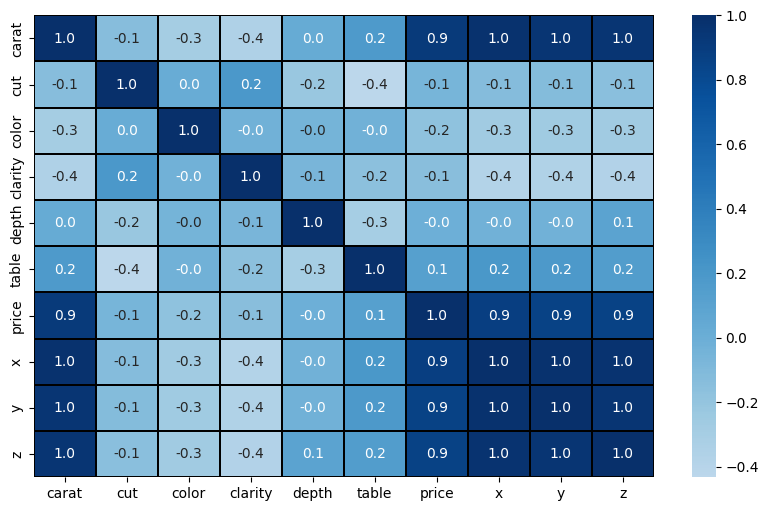

In [15]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=[10, 6])
sns.heatmap(df_numeric.corr(), annot=True, fmt='.1f', cmap="Blues", linewidths=1.25,
            linecolor="black", center=0)
plt.show()

>**Findings:** Diamond price has very strong correlations with the stone's dimensions and carat. Clarity and color have a slight negative correlation in regard to the diamond's dimensions and carat, further investigation would be needed to determine whether or not this is a coincidence. Understandably, certain characteristics, such as cut and color appear to have no relation.

**Writing code to render scatterplots.** Price will be our y-axis for each plot.

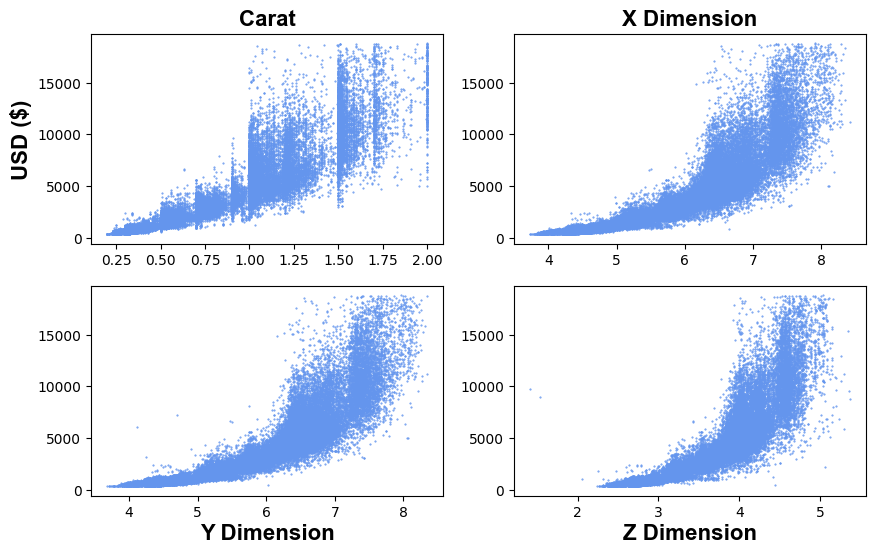

In [16]:
# Set size of the chart window
plt.figure(figsize=(10, 6))

# Diamond clarity frequency bar chart
carat_chart = plt.subplot(gs[0, 0])  # row 0, col 0
carat_chart.set_title("Carat", fontdict=plot_font)
carat_chart.scatter(df['carat'], df['price'], color="cornflowerblue", s=0.25)
carat_chart.set_ylabel("USD ($)", fontdict=plot_font)

# Diamond color frequency bar chart
x_dimension_chart = plt.subplot(gs[0, 1]) # row 0, col 1
x_dimension_chart.set_title("X Dimension", fontdict=plot_font)
x_dimension_chart.scatter(df['x'], df['price'], color="cornflowerblue", s=0.25)


# Diamond cut frequency bar chart
y_dimension_chart = plt.subplot(gs[1, 0])  # row 1, span all columns
y_dimension_chart.set_title("Y Dimension", fontdict=plot_font, y=-0.25)
y_dimension_chart.scatter(df['y'], df['price'], color="cornflowerblue", s=0.25)

# Diamond cut frequency bar chart
z_dimension_chart = plt.subplot(gs[1, 1])  # row 1, span all columns
z_dimension_chart.set_title("Z Dimension", fontdict=plot_font, y=-0.25)
z_dimension_chart.scatter(df['z'], df['price'], color="cornflowerblue", s=0.25)

plt.show()

>**Findings:** Each characteristic plotted above shows a linear relationship in regard to price. The carat chart has vertical lines created by the datapoints. This is most likely caused by certain carat sizes being standardized and therefore very common, thus creating lines.  

## Part 3: Machine Learning Modelling
The dataset has been cleaned, and we have gained a strong understanding of the relationships between the variables. We now move on to the main event, creating a **neural network** capable of predicting the price of a diamond. In this case we will be using a supervised technique known as a multilayer perceptron (MLP), which is a neural network consisting of at least three layers.<br></br>

There are several steps involved in getting the MLP model up and running. It is a supervised machine learning technique, meaning the model needs an answer key that can be used to check its prediction. In this case the price variable is what will be used to test the accuracy of the model. All the diamond characteristics form the **inputs**, the price is the **output**. Take special note of this terminology, it will be important later on.<br></br>


### During this stage we will do the following:
>**(3.1) Preparing inputs & outputs.**  <br></br>
>**(3.2) Implementing the MLP.**  <br></br>
>**(3.3) Evaluating the accuracy of the model.**

## Part 3.1:  Preparing Inputs & Outputs
An MLP requires a input and output in order to work, during this stage these will be created During the feature engineering step, we created a dataframe where all the categorial variables where replaced with numeric ones. This dataframe will be the bases of our inputs and outputs since a neural network cannot be given non-numeric inputs. Another important factor we will address during this stage is efficiency, a neural network of this type can be very resource intensive if the data is not formatted properly.

**Creating the inputs and output dataframe.**

In [17]:
sample_set = df_numeric.sample(n = 5)  # Grabs 5 random rows 

inputs = df_numeric.drop(['price'], axis=1)  # Create new df with only characteristics, not price
outputs = df_numeric["price"]  # Create a df with only price

print(inputs.head(1))
print('_' * 70)
print(outputs.head(1))
print(type(outputs))

   carat  cut  color  clarity  depth  table     x     y     z
0   0.23    5      6        2   61.5   55.0  3.95  3.98  2.43
______________________________________________________________________
0    326
Name: price, dtype: int64
<class 'pandas.core.series.Series'>


> Above the line we can see the first row of the inputs dataframe, which we can tell imported correctly. Below that we see the first entry (326) in the output **series**. Since the outputs only has one column (price), Pandas automatically turns it into a series instead of a dataframe. Series are very similar to lists or one dimensional arrays.

**Splitting the dataset.** We want to use most of the data (80% in this case) to teach the model how to make predictions, we call this **training**. With that being said, some of the data must also be reserved to test the accuracy of the model, we cannot test accuracy on data that the network has already been exposed to, so 20% of the data will be set aside to test accuracy later on, we will call this our **test** data.

In [18]:
from sklearn.model_selection import train_test_split

# X is the input, Y is the output
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2) 

**Scaling the Inputs and Outputs**. 

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Create the scalers
#scaler1 = MinMaxScaler(feature_range=(0, 20))
#scaler2 = MinMaxScaler(feature_range=(0, 20))
scaler1 = StandardScaler()
scaler2 = StandardScaler()

# Scale the inputs
x_train = scaler1.fit_transform(x_train)
x_test = scaler1.transform(x_test)

# Scale the outputs
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

## Part 3.2: Implementing the MLP
The data is now in a format that the network can use to make predictions. Now, let's write code to put the MLP in place. 


**Creating the MLP code.** We are not feeding it data just yet, simply defining its parameters.

In [20]:
from sklearn.neural_network import MLPRegressor

network = MLPRegressor(hidden_layer_sizes=(6,), 
                       activation='relu',
                       solver='adam',
                       alpha=0.0001,
                       batch_size='auto',
                       learning_rate='constant',
                       learning_rate_init=0.001,
                       max_iter=2000, 
                       n_iter_no_change=100,  
                       verbose=False,) 

**Fitting the Network.** This is the actual network training.

In [21]:
network.fit(x_train, y_train.reshape(-1, 1).ravel());

> The model has now been trained.

## Part 3.3: Evaluating Accuracy
The next logical step is to test the accuracy of the model. There are several different metrics that can be used to test accuracy, each with their own benefits. For our exercise we will be using **mean absolute error (MAE)** and **R squared (R2)**. Our project will use R2 as t <br></br>


<div class="alert alert-block alert-info"> <b>What is R2?</b><br></br> 
R2 measures the variance between the actual answers and the predicted answers. The R2 score will work as a percentage, falling between 0 and 1. A score of 0.98 could be seen as excellent, whereas a score of 0.25 could be seen as very poor. For our project, we will strive to get an R2 score of at least 0.90.
</div>

<div class="alert alert-block alert-info"> <b>What is MAE?</b><br></br> 
MAE calculates the non-negative difference between the actual value and predicted value, then the average of that (the mean) is taken. A MAE score of 0 is perfect accuracy. Unlike R2, MAE is far more subjective and cannot be compared across different datasets, what is considered a good score on our diamond dataset may be considered a very poor score on a house price dataset. Let's elaborate, if we have a MAE score of 10,000, this means on average our model is incorrect by 10,000 points, a house costs hundreds of thousands of dollars, therefore being off by 10,000 could be acceptable, however, a diamond might cost only a few thousand, at which point being off by 10,000 would be highly inaccurate.
</div>

In [22]:
## TODO: THESE SCORES ARE CALCULATED ON SCALED VALUES, IS THAT OK?

from sklearn import metrics
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

prediction_scaled = network.predict(x_test)
prediction = scaler2.inverse_transform(prediction_scaled.reshape(-1, 1))

answers = scaler2.inverse_transform(y_test.reshape(-1, 1))

print('R Squared:', metrics.r2_score(answers, prediction))
print("MAE:", mean_absolute_error(y_true=answers, y_pred=prediction))

# network.predict(x_test)

R Squared: 0.9729818177369046
MAE: 367.8009582356431


>**Findings:** The R Squared score looks great, but the MAE paints a more clearer picture of what is going on. Accuracy could be improved perhaps by using a larger dataset, fine tuning the MLP parameters, or more extensive dataset modification.

**Testing accuracy using actual values.** The metrics used above are useful in getting a general idea of how accurate the model is, but seeing is believing. Let's select five values from the dataset and run a prediction on them. We can simply select the first five values in the **y_test** list, since these where all randomly shuffled when the dataset was split

In [23]:
sample_outputs = sample_set["price"].to_numpy().reshape(-1, 1)  # Create a df with only price, convert from df to 2D array
sample_inputs = sample_set.drop(['price'], axis=1)  # Create new df with only characteristics, not price

sample_inputs = scaler1.transform(sample_inputs)  # Scale the inputs

prediction = network.predict(sample_inputs)

prediction = scaler2.inverse_transform(prediction.reshape(-1, 1))  # Scale the inputs back

**Adding some print statements and metrics to better understand the results.**

In [24]:
# Both these values are initialized to a number that will be overwritten
largest_difference = 0;
smallest_difference = 15000;  

counter = 0
for counter in range(5):
    predicted_val = int(round(prediction[counter][0], 0))
    actual_val = sample_outputs[counter][0]
    
    current_difference = abs(predicted_val - actual_val)
    if(current_difference > largest_difference):
        largest_difference = current_difference
    elif(current_difference < smallest_difference):
        smallest_difference = current_difference
    
    
    print("PREDICTION: $", predicted_val)
    print("ACTUAL:     $", actual_val)
    print("_" * 18)
    
print('R Squared:', metrics.r2_score(sample_outputs, prediction))
print("MAE:", mean_absolute_error(y_true=sample_outputs, y_pred=prediction))
print("Largest Difference: Off by $"  + str(largest_difference))
print("Smallest Difference: Off by $" + str(smallest_difference))

PREDICTION: $ 5154
ACTUAL:     $ 5347
__________________
PREDICTION: $ 656
ACTUAL:     $ 790
__________________
PREDICTION: $ 20438
ACTUAL:     $ 16804
__________________
PREDICTION: $ 6275
ACTUAL:     $ 6002
__________________
PREDICTION: $ 656
ACTUAL:     $ 789
__________________
R Squared: 0.9221255145142568
MAE: 873.3176153362547
Largest Difference: Off by $3634
Smallest Difference: Off by $133


>**Findings:** All the predictions appear to be in the ballpark of the actual answers. Some values are very close, while others are off by a good amount. Regardless, this provides visual proof that the model does indeed make reasonable predictions. 

## Part 4: Providing a GUI
For this project to be useful, users must be able to input their own values. Let's define a basic GUI for this purpose.

In [25]:
import prediction_interface

gui = prediction_interface.PredictionInterface()
gui.set_x_scaler(scaler1)
gui.set_y_scaler(scaler2)
gui.set_trained_model(network)
gui.launch_interface()